## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import collections


from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Let's look at the frequency of each digit in the data set. This will allow us to see if the data set is balanced or not.

In [5]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({3: 183,
         1: 182,
         5: 182,
         4: 181,
         6: 181,
         9: 180,
         7: 179,
         0: 178,
         2: 177,
         8: 174})

We can look at the count of each digit using a histogram as well...

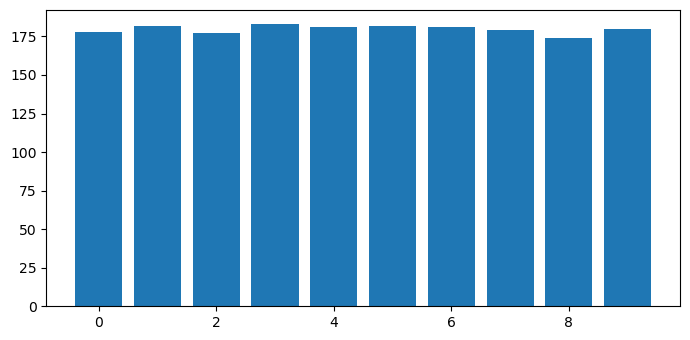

In [6]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [7]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [8]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

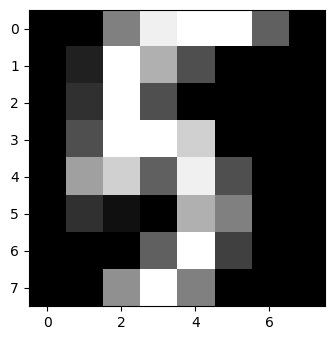

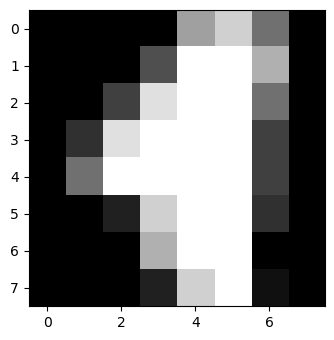

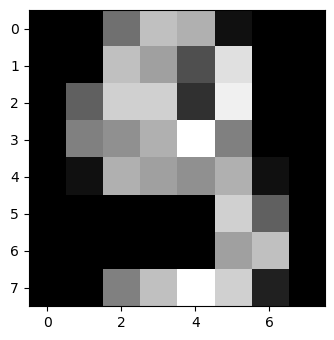

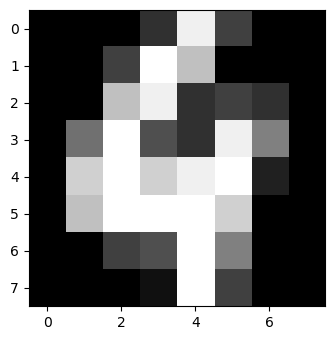

In [10]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


Now that we understand data splitting, we can now use this in our model building process.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

## Normalize/Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Neural Net

In [13]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: user 13.3 s, sys: 631 ms, total: 13.9 s
Wall time: 2.42 s


In [14]:
%%time
y_pred = ann.predict(X_test)

CPU times: user 330 ms, sys: 3.55 ms, total: 334 ms
Wall time: 42.3 ms


Sinc this is a multi-class target (0 through 9), our confusion matrix is a 10x10 matrix.

In [15]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

## Interpretting Multi-Class Confusion Matrix

Interpretting a multi-class confusion matrix is a bit more complicated than a binary confusion matrix. The issue is how to 'aggregate' the results. Micro-averaging and macro-averaging are two common approaches. 

* In micro-averaging, we simply sum up all the cells in the confusion matrix and then compute the metric (accuracy, recall, precision, f1-score). 
* In macro-averaging, we compute the metric (accuracy, recall, precision, f1-sscore) for each class and then average the results. 

The difference between macro and micro averaging is that macro averaging gives equal weight to each category while micro averaging gives equal weight to each sample. If we have the same number of samples for each class, both macro and micro will provide the same score.

For example, if we had a 3-class problem with the following actual and predicted values

In [16]:
actual =    [0,0,1,1,0,2,2,2,0,1]
predicted = [0,1,1,0,0,2,1,2,2,1]

The confusion matrix for this would be:

In [17]:
c_matrix = confusion_matrix(actual, predicted)
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]])

**ACCURACY**
  * The micro-averaged accuracy would be ```0.60``` (sum of the diagonal divided by all total of all cells). 
    * (2) + (2) + (2) = 6
    * (2+1+1) + (1+2+0) + (0+1+2) = 10
    * 6/10 = 0.60
  * The macro-averaged accuracy would be ```0.94``` (average of the accuracy of each class prediction - each row). 
    * ((2/4) + (2/3) + (1/3)) / 3 = (.5+.66666+.33)/3 = 0.5
  * The weighted marco average accuraccy woudl be ```0.6``` (average of the accuracy of each class prediction weighted by the number of samples in each class). 
    * ((2/4)*4 + (2/3)*3 + (1/3)*3) / 3 = (2+2+1)/3 = 0.6
  * *NOTE1: For a multi-class problem, the accuracy is the same as the micro f1-score.*
  * *NOTE2: For a multi-class problem, the micro and weighted macro accuracy are the same.*

In [18]:
accuracy = np.sum(np.diag(c_matrix)) / np.sum(c_matrix)
accuracy

0.6

In [19]:
accuracy_score(actual, predicted)

0.6

In [20]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]])

In [21]:
confusion_matrix(actual, predicted)

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]])

In [22]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



**RECALL**
  * The micro-averaged recall would be ```0.600``` (sum of all cells divided by the sum of the row totals). 
    * 2 + 2 + 2 = 6
    * (1+1) + (1+0) + (0+1) = 4
    * 6/10 = 0.600
  * The macro-averaged recall would be ```0.611``` (average of the recall of each class prediction - each row). 
    * ((2/3) + (2/4) + (2/3))/3 = 0.611
  * The weighted-macro-averaged recall would be `````` (average of the recall of each class prediction weighted by the number of samples in each class). 
    * ((2/3)*3 + (2/4)*4 + (2/3)*3)/ (4+3+3) = 0.600
  * *NOTE1: For a multi-class problem, the recall micro is the same as the micro f1-score.*

In [23]:
recall_score(actual, predicted, average='micro')

0.6

In [24]:
recall_score(actual, predicted, average='macro')

0.611111111111111

In [25]:
recall_score(actual, predicted, average='weighted')

0.6

In [26]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]])

In [27]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



**PRECISION**
  * The micro-averaged precision would be ```0.600``` (sum of all cells divided by the sum of the column totals). 
    * 2 + 2 + 2 = 6
    * (1+1) + (1+0) + (0+1) = 4
    * 6/10 = 0.600
  * The macro-averaged precision would be ```0.611``` (average of the precision of each class prediction - each row). 
    * ((2/4) + (2/3) + (2/3))/3 = 0.611
  * The weighted macro-averaged precision would be ```0.617``` (average of the precision of each class prediction weighted by the number of samples in each class). 
    * ((2/4)*3 + (2/3)*4 + (2/3)*3)/ (4+3+3) = 0.617


In [28]:
precision_score(actual, predicted, average='micro')

0.6

In [29]:
precision_score(actual, predicted, average='macro')

0.611111111111111

In [30]:
precision_score(actual, predicted, average='weighted')

0.6166666666666666

**F1-SCORE**
  * Manual Calculation: I'll leave this for an exercise for you to try 

In [31]:
f1_score(actual, predicted, average='micro')

0.6

In [32]:
f1_score(actual, predicted, average='macro')

0.6031746031746033

In [33]:
f1_score(actual, predicted, average='weighted')

0.6

> In general, the micro-average is usually preferred for multi-class problems.

Now, for our model, we can summarize each of these metrics as follows:

In [34]:
accuracy = ann.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")


f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")


Accuracy:           0.9806
F1 Micro:           0.9806
F1 Macro:           0.9795
F1 Weighted:        0.9806
Recall Micro:       0.9806
Recall Macro:       0.9790
Recall Weighted:    0.9790
Precision Micro:    0.9806
Precision Macro:    0.9806
Precision Weighted: 0.9806


But, we often are most concerned with the values displayed in the classification report summary table.

In [35]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9722    1.0000    0.9859        35
           2     1.0000    0.9722    0.9859        36
           3     0.9535    1.0000    0.9762        41
           4     0.9744    1.0000    0.9870        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9310    0.9643        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9806       360
   macro avg     0.9806    0.9790    0.9795       360
weighted avg     0.9811    0.9806    0.9806       360



It might help for you to visualize the performance of this model as follows:

[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


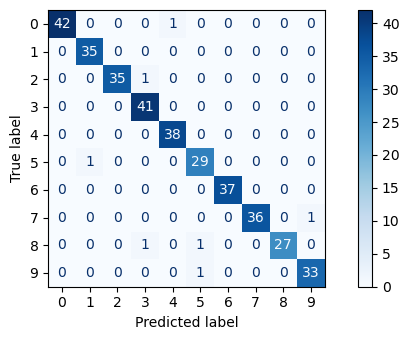

In [36]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

We can see in the above table which digits are a problem for this model. We can see that most of our predictions are correct, but we have a small issue with 0's (one false positive where it thought a 0 was a 4), 2 (where it thought a 2 was a 3), 5's (where it thought a 5 was a 1) 7s (where it thought a 7 was a 9), 8s (where it thought a 8 was a 5, and another 8 was a 3) and 9s  (where it thought a 9 was a 5).

In the next sections, we will use hyperparameter tuning to see if we can improve the performance of this model.

NOTE: Since we don't really have a difference in cost between false positives and false negatives, and we have a relatively balanced dataset, we will use accuracy as our metric for hyperparameter tuning.

NOTE2: If we had a very unbalanced dataset, we might want to use a different metric for hyperparameter tuning. For example, if we had a dataset where 99% of the samples were 0s, and 1% of the samples were 1s, then we would want to use a different metric for hyperparameter tuning. In such imbalanced cases, we would want to use the f1-score for the 1s (since this is the class we are most concerned with). Another approach would be to under-sample the 0s (so we have a balanced dataset) and then use accuracy as our metric for hyperparameter tuning.; or similaryly, over-sample the 1s (so we have a balanced dataset) and then use accuracy as our metric for hyperparameter tuning. We will see oversampleing and undersampling in a later exercise.

## With RandomizedSearchCV

In [37]:
%%time

score_measure = "accuracy"
kfolds = 4

param_grid = {
    'hidden_layer_sizes': [ (32,), (64,), (128,), (32,16), (64,32), (128,64), (40,20)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [9000]
}

ann = MLPClassifier(random_state=1)
rand_search = RandomizedSearchCV(
    estimator = ann,                    # the model to use
    param_distributions=param_grid,     # the parameter grid
    cv=kfolds,                      # number of folds
    n_iter=200,                     # number of iterations; this is the number of parameter settings that are sampled
    scoring=score_measure,          # score measure used to evaluate parameter combinations
    verbose=0,                      # verbose level; the higher, the more messages. 0 for no messages
    n_jobs=-1,                      # number of parallel jobs to run >> n_jobs=-1 will utilize all available CPUs 
    random_state=1                  # random state ensures that the splits are the same for each iteration
)

rand_search.fit(X_train, y_train)

bestMLPClassifier = rand_search.best_estimator_

print(rand_search.best_params_)

{'solver': 'adam', 'max_iter': 9000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (128, 64), 'alpha': 0.5, 'activation': 'relu'}
CPU times: user 39.4 s, sys: 1.95 s, total: 41.4 s
Wall time: 4min 2s


In [38]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    1.0000    1.0000        41
           4     0.9744    1.0000    0.9870        38
           5     0.9677    1.0000    0.9836        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    1.0000    1.0000        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9917       360
   macro avg     0.9913    0.9920    0.9916       360
weighted avg     0.9918    0.9917    0.9917       360

CPU times: user 10.5 ms, sys: 1.57 ms, total: 12 ms
Wall time: 4.14 ms


[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


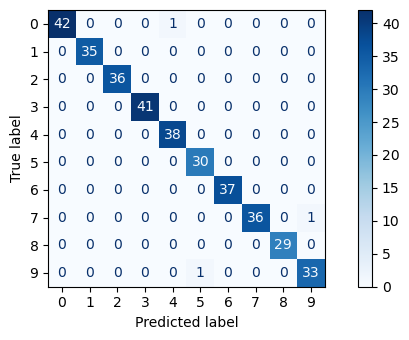

In [39]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## With GridSearchCV

In [40]:
%%time

score_measure = "accuracy"
kfolds = 4

activation = rand_search.best_params_['activation']
solver = rand_search.best_params_['solver']
alpha = rand_search.best_params_['alpha']
learning_rate = rand_search.best_params_['learning_rate']
learning_rate_init = rand_search.best_params_['learning_rate_init']
max_iter = rand_search.best_params_['max_iter']

param_grid = {
    'hidden_layer_sizes': [ (127,63), (126,62), (125,61), (124,60), (129,65), (130,66,), (131,67)],
    'activation': [activation],
    'solver': [solver],
    'alpha': [alpha-0.1, alpha, alpha+0.1, alpha+0.2, alpha+0.3, alpha+0.4, alpha+0.5, alpha+0.6, alpha+0.7, alpha+0.8, alpha+0.9],
    'learning_rate': [learning_rate],
    'learning_rate_init': [learning_rate_init-0.0009, learning_rate_init-0.0005, learning_rate_init, learning_rate_init+0.0001, learning_rate_init+0.0002, learning_rate_init+0.0005, learning_rate_init+0.001],
    'max_iter': [5000]
}

ann = MLPClassifier(random_state=0)
grid_search = GridSearchCV(
    estimator = ann,        # the model that will be evaluated
    param_grid=param_grid,  # the dictionary of hyperparameters
    cv=kfolds,              # number of folds to use for k-fold cross validation
    scoring=score_measure,  # the scoring metric to optimize for
    verbose=0,              # controls the amount of diagnostic information displayed, 0 means none
    n_jobs=-1,              # Number of similtaneous threads to run to accomplish this n_jobs=-1 will utilize all available CPUs 
)
grid_search.fit(X_train, y_train)

bestMLPClassifier = grid_search.best_estimator_

print(grid_search.best_params_)

{'activation': 'relu', 'alpha': 0.4, 'hidden_layer_sizes': (127, 63), 'learning_rate': 'invscaling', 'learning_rate_init': 0.00010000000000000005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: user 1min 13s, sys: 5.98 s, total: 1min 19s
Wall time: 9min 24s


In [41]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    1.0000    1.0000        41
           4     0.9744    1.0000    0.9870        38
           5     0.9375    1.0000    0.9677        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9655    0.9825        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9889       360
   macro avg     0.9882    0.9886    0.9882       360
weighted avg     0.9893    0.9889    0.9889       360

CPU times: user 51 ms, sys: 3.1 ms, total: 54.1 ms
Wall time: 12.4 ms


[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


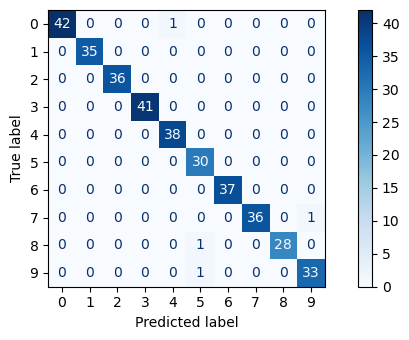

In [42]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()